In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_excel('Online_Retail.xlsx')

In [38]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [41]:
data.shape

(541909, 8)

In [42]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [43]:
data.isnull().sum()/100

InvoiceNo         0.00
StockCode         0.00
Description      14.54
Quantity          0.00
InvoiceDate       0.00
UnitPrice         0.00
CustomerID     1350.80
Country           0.00
dtype: float64

In [44]:
numeric = data.select_dtypes(include="number")

In [45]:
numeric.isnull().sum()

Quantity           0
UnitPrice          0
CustomerID    135080
dtype: int64

In [46]:
data.drop("CustomerID", axis=1, inplace=True)

In [47]:
data["Description"].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [48]:
data["Description"].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [49]:
data["Description"] = data["Description"].fillna("Unknown")

In [50]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [51]:
data.isnull().sum()/100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
Country        0.0
dtype: float64

In [52]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])


In [53]:
data_category = data.select_dtypes(include= "object")

In [54]:
for col in data_category.columns:
    print(f"Unique values in {col}:")
    print(data_category[col].unique())
    print()


Unique values in InvoiceNo:
[536365 536366 536367 ... 581585 581586 581587]

Unique values in StockCode:
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]

Unique values in Description:
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

Unique values in Country:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']



In [55]:
data_encode = data.copy()

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data_encode.columns:
    if data_encode[col].dtype == 'object':
        data_encode[col] = le.fit_transform(data_encode[col].astype(str))


In [57]:
data_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  int32         
 1   StockCode    541909 non-null  int32         
 2   Description  541909 non-null  int32         
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   Country      541909 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(1)
memory usage: 20.7 MB


In [58]:
# Group by StockCode and calculate average UnitPrice
avg_price = data_encode.groupby('StockCode')['UnitPrice'].mean().reset_index()

# Rename the column for clarity
avg_price.rename(columns={'UnitPrice': 'AvgUnitPrice'}, inplace=True)

# Merge back with your main dataframe
data_encode = data_encode.merge(avg_price, on='StockCode', how='left')


In [59]:
features = ['StockCode', 'Description', 'Quantity', 'AvgUnitPrice']
X = data_encode[features]

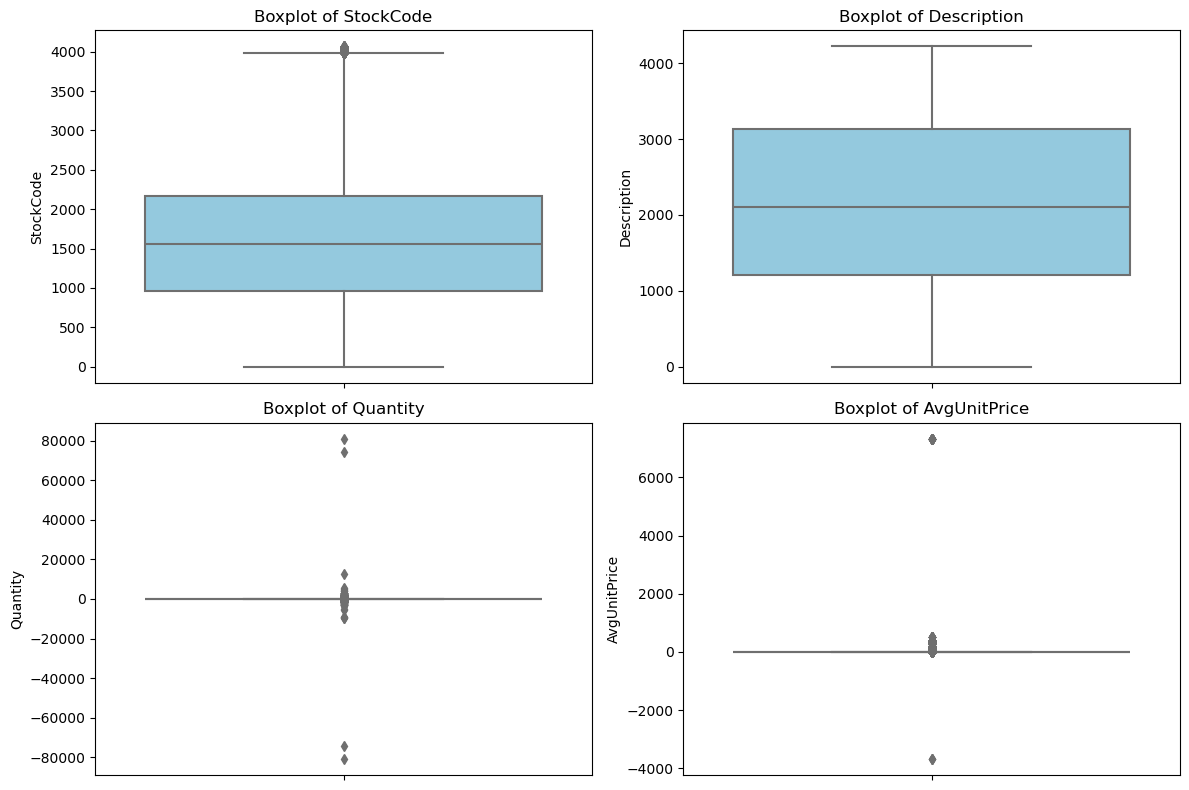

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['StockCode', 'Description', 'Quantity', 'AvgUnitPrice']

# Create a boxplot for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.boxplot(y=data_encode[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


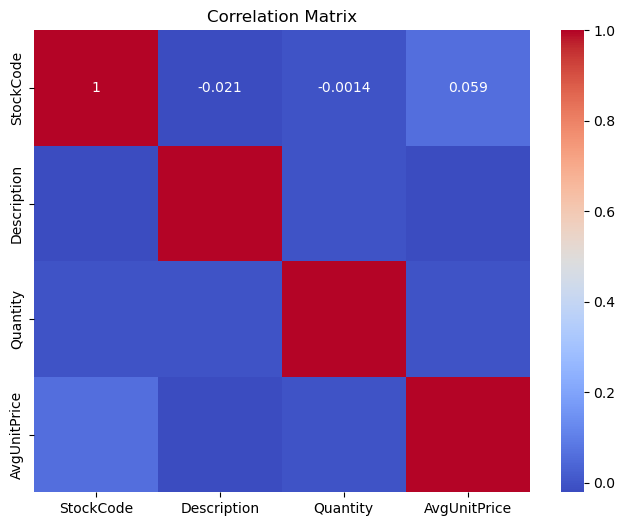

In [62]:


# Select only the relevant columns
cols = ['StockCode', 'Description', 'Quantity', 'AvgUnitPrice']
correlation = data_encode[cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


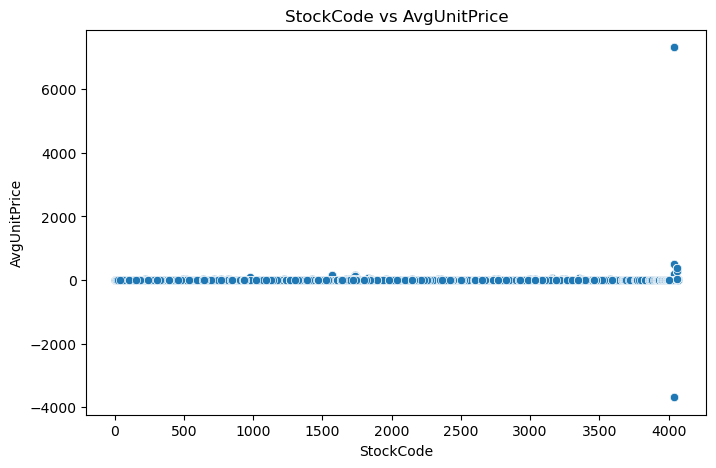

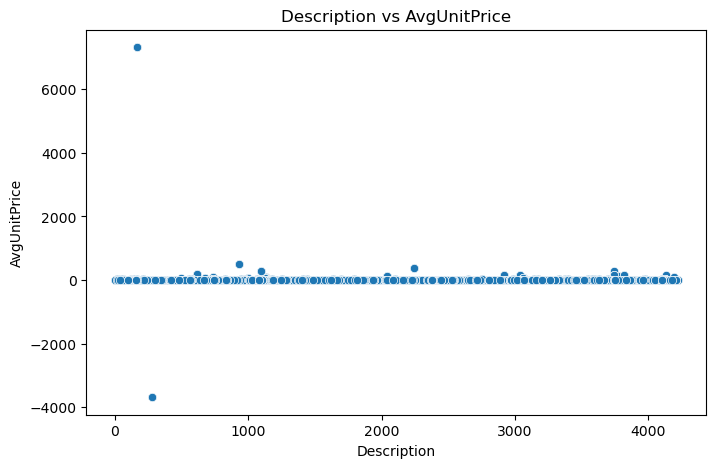

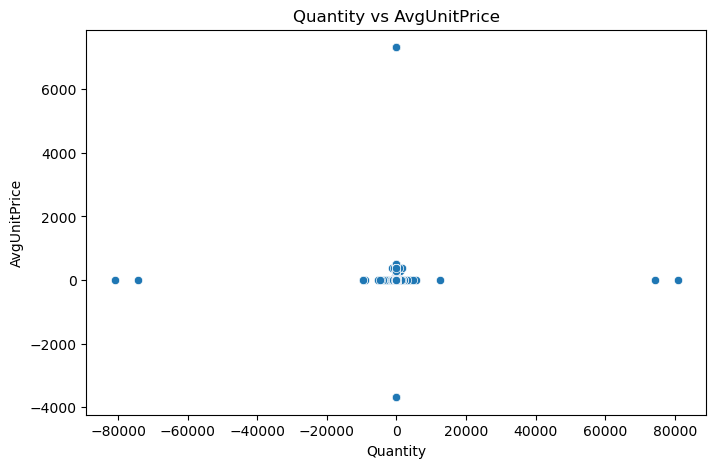

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each feature (except AvgUnitPrice itself)
for col in ['StockCode', 'Description', 'Quantity']:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data_encode, x=col, y='AvgUnitPrice')
    plt.title(f'{col} vs AvgUnitPrice')
    plt.xlabel(col)
    plt.ylabel('AvgUnitPrice')
    plt.show()


In [72]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Take smaller sample
sample = data_encode.sample(n=20000, random_state=42)

features = ['StockCode', 'Quantity', 'Description', 'AvgUnitPrice']
X = sample[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

hierarchical = AgglomerativeClustering(n_clusters=4)
clusters = hierarchical.fit_predict(X_pca)

sample['Cluster'] = clusters

print(sample['Cluster'].value_counts())


Cluster
0    10768
2     9169
3       46
1       17
Name: count, dtype: int64


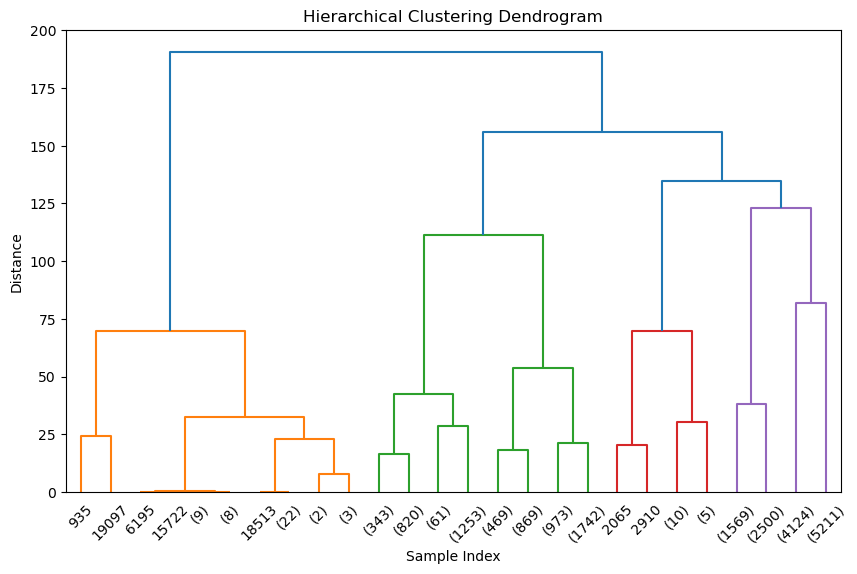

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming X_scaled is your scaled numeric data (e.g., sample features)
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=4)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


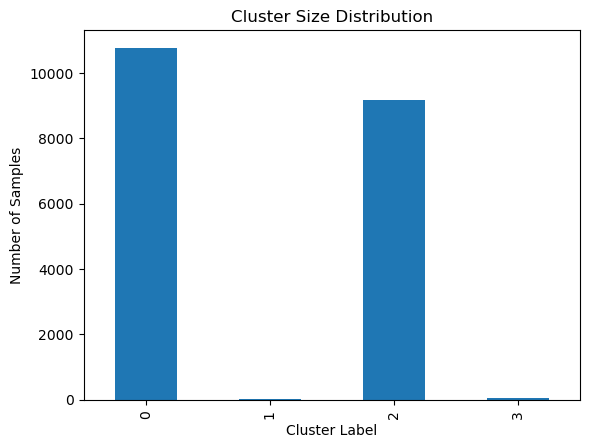

In [74]:
import matplotlib.pyplot as plt

sample['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Cluster Size Distribution')
plt.show()


In [75]:
sample = data_encode.sample(n=20000, random_state=42)


In [76]:
X = sample[features]
X_scaled = scaler.fit_transform(X)
clusters = hierarchical.fit_predict(X_scaled)


In [77]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Use the same scaled sample features and clusters
sil_score = silhouette_score(X_scaled, clusters)
calinski_score = calinski_harabasz_score(X_scaled, clusters)
davies_score = davies_bouldin_score(X_scaled, clusters)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Calinski-Harabasz Score: {calinski_score:.3f}")
print(f"Davies-Bouldin Score: {davies_score:.3f}")


Silhouette Score: 0.296
Calinski-Harabasz Score: 6459.799
Davies-Bouldin Score: 0.953


In [78]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Take smaller sample
sample = data_encode.sample(n=20000, random_state=42)

features = ['StockCode', 'Quantity', 'Description', 'AvgUnitPrice']
X = sample[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Use KMeans clustering instead of hierarchical
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

sample['Cluster'] = clusters

print(sample['Cluster'].value_counts())


Cluster
1    10834
0     9101
2       46
3       19
Name: count, dtype: int64


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Your selected features including encoded 'Description'
features = ['StockCode', 'Quantity', 'Description', 'AvgUnitPrice']

# Step 1: Sample 10,000 rows
sample = data_encode.sample(n=20000, random_state=42)

# Step 2: Select only numeric columns from features
X = sample[features]

# Step 3: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Step 5: Add cluster labels to sample dataframe
sample['Cluster'] = clusters

# Step 6: Check cluster distribution
print(sample['Cluster'].value_counts())


Cluster
0    10543
2     9404
1       45
3        8
Name: count, dtype: int64


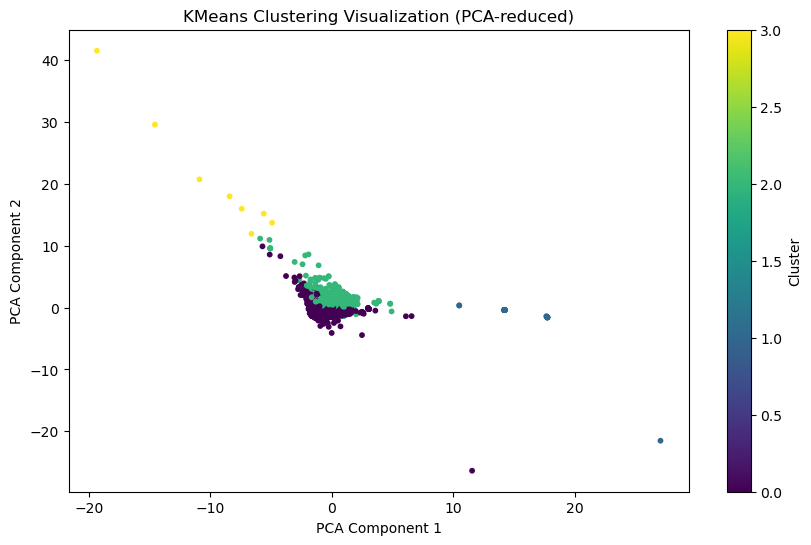

In [80]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.title("KMeans Clustering Visualization (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


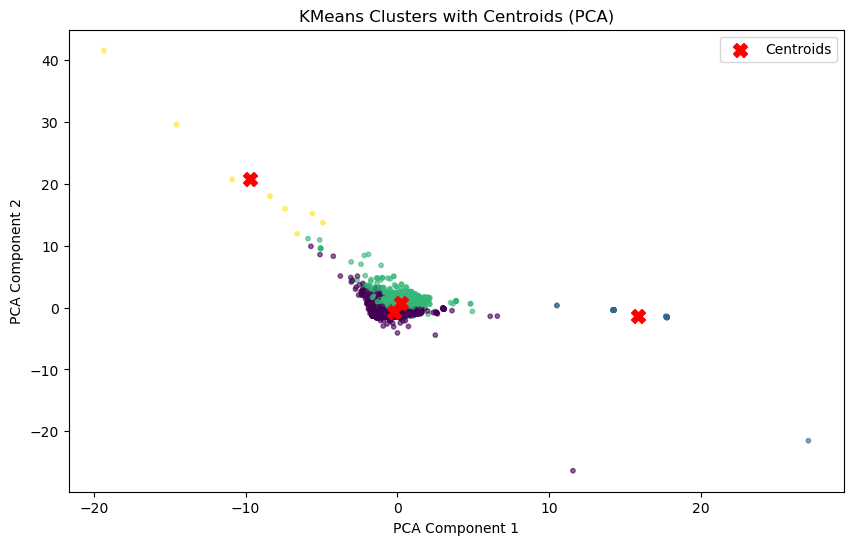

In [81]:
# Plot with cluster centers
centers = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.title("KMeans Clusters with Centroids (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


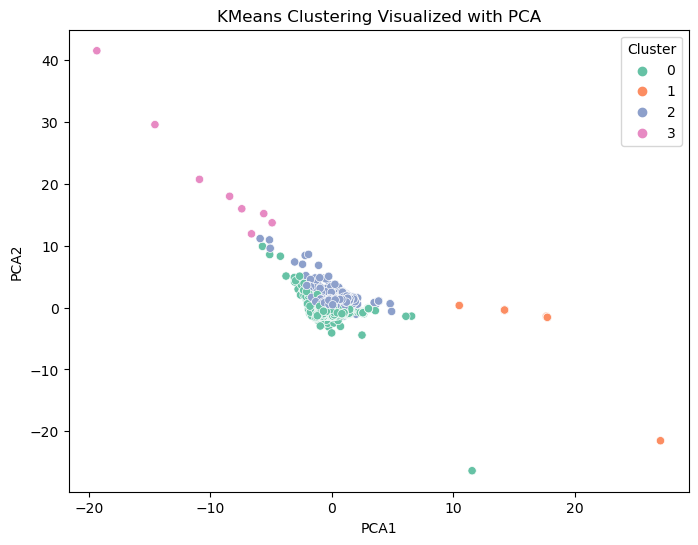

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming you have a sample dataframe 'sample' corresponding to X_scaled
# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA result to the sample dataframe (not the full data_encode)
sample['PCA1'] = X_pca[:, 0]
sample['PCA2'] = X_pca[:, 1]

# Plot clusters in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sample, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', legend='full')
plt.title("KMeans Clustering Visualized with PCA")
plt.show()


In [83]:
print(sample.groupby('Cluster')[features].mean())

           StockCode     Quantity  Description  AvgUnitPrice
Cluster                                                     
0        1527.219008     9.093522  3053.555724      3.352291
1        4058.555556   -29.088889  1586.755556    324.409843
2        1792.789770     9.488516  1091.691408      3.367675
3        2180.375000  1441.500000  2828.125000      2.201840


In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assume X_scaled already defined (from StandardScaler)
# Fit KMeans with 5 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Evaluate clustering quality
sil_score = silhouette_score(X_scaled, clusters)
calinski_score = calinski_harabasz_score(X_scaled, clusters)
davies_score = davies_bouldin_score(X_scaled, clusters)

print(f"Silhouette Score: {sil_score:.3f} (higher is better)")
print(f"Calinski-Harabasz Score: {calinski_score:.3f} (higher is better)")
print(f"Davies-Bouldin Score: {davies_score:.3f} (lower is better)")


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.326 (higher is better)
Calinski-Harabasz Score: 7406.174 (higher is better)
Davies-Bouldin Score: 0.827 (lower is better)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

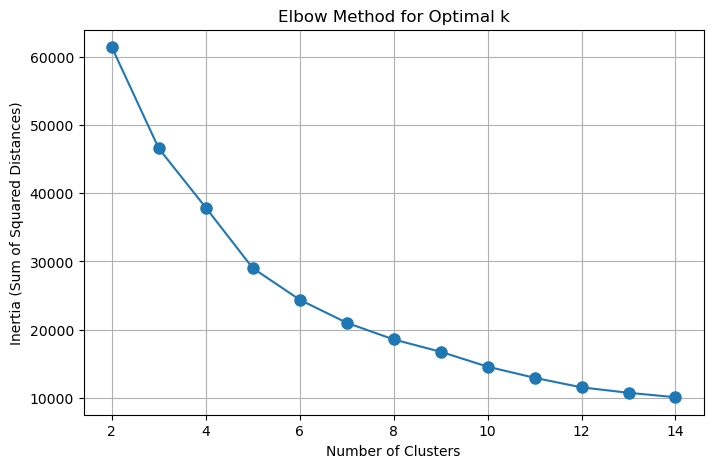

In [85]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using the Elbow Method (Inertia)
inertias = []
max_clusters = 15

for c in range(2, max_clusters):
    km = KMeans(n_clusters=c, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Plotting the inertia values
plt.figure(figsize=(8, 5))
plt.plot(range(2, max_clusters), inertias, marker='o', markersize=8)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


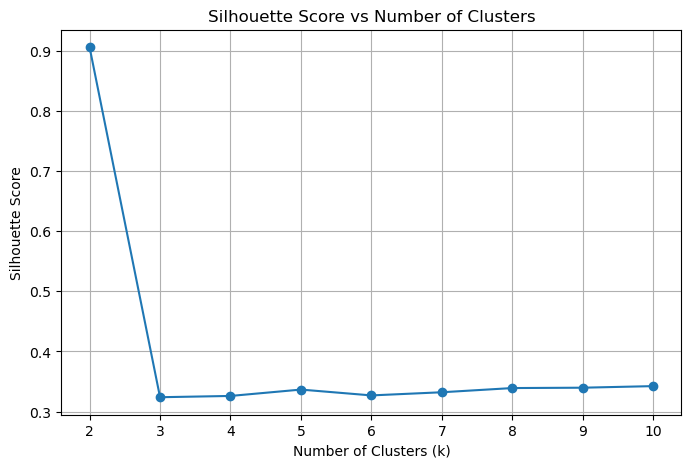

In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

# Evaluate silhouette score for k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)  # Use X_scaled here
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
